In [17]:
import pandas as pd
import numpy as np
import random as rn
import matplotlib.pyplot as plt
import copy

In [18]:
X=[]
for i in range(1000):
    X.append(np.random.randint(0,1000,2))
X = np.array(X)

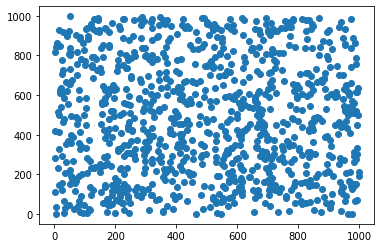

In [19]:
plt.scatter(X[:,0],X[:,1])

# CLARA

In [20]:
def distance(x, y):
    d = 0
    for i in range(len(x)):
        d += (x[i]-y[i])**2
    d = np.sqrt(d)
    return d

In [21]:
def cluster(X, M, k):
    C = []
    cost = 0
    for i in range(k):
        C.append([])
    for i in range(len(X)):
        minidx = 0
        mindist = np.inf
        for j in range(k):
            d = distance(X[i],M[j])
            if(d < mindist):
                minidx = j
                mindist = d
        C[minidx].append(i)
        cost += mindist
    return C, cost

In [22]:
def calMedoids(X, C, M, k):
    newMed = rn.choice(X)
    N = copy.deepcopy(M)
    if(newMed not in M):
        for j in range(k):
            N = copy.deepcopy(M) 
            N[j] = newMed
            CM, m = cluster(X, M, k)
            CN, n = cluster(X, N, k)
            if(n < m):
                break
    return N

In [23]:
def initialSeed(X, k):
    Sel = []
    n = len(X)
    a = rn.choice(X)
    Sel.append(a)
    dis = np.zeros(n)
    for i in range(k-1):
        for i in range(n):
            dis[i] += distance(X[i], a)
        m = np.argmax(dis)
        a = X[m]
        Sel.append(a)
    Sel = np.array(Sel)
    return Sel

In [29]:
def clara(X, k, TS, SS, iter = 100):
    M = initialSeed(X, k)
    bestCost = np.inf
    for i in range(TS):
        S = rn.choices(X, k=SS)
        for lp in range(iter):
            C, cost = cluster(S, M, k)
            N = calMedoids(S, C, M, k)
            M = copy.deepcopy(N)
        if(cost < bestCost):
            bestM = copy.deepcopy(M)
            bestCost = cost
    C, cost = cluster(X, bestM, k)
    return C

In [34]:
res = clara(X, 4, 20, 200)

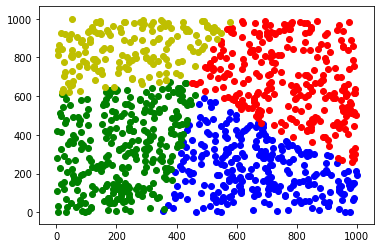

In [35]:
import matplotlib.pyplot as plt
color = ['b','g','r','y','c','k','m']
fig = plt.figure()
ax  = fig.add_subplot(111)
for i in range(len(res)):
    lst = []
    col = color[i]
    for j in range(len(res[i])):
        lst.append(X[res[i][j]])
    lst = pd.DataFrame(lst)
    ax.scatter(lst[0],lst[1],c=col)
plt.show()